In [1]:
# Load libraries

import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pySuStaIn
import statsmodels.formula.api as smf
from scipy import stats
import sklearn.model_selection

In [2]:
data = pandas.read_csv(os.path.join('..', 'data', 'ADNI_ROI_2AIcenter_0220716.csv'))
data.diagnosis.replace({'MCIAD':1, 'CTL':0}, inplace=True)
# data_0 = data[data.diagnosis == 0].sample(n = 150)
# data_1 = data[data.diagnosis == 1]
# data = data_0.append(data_1)
data.head()

,PT,gender,age,diagnosis,Frontal_lobeboth,Temporal_lobeboth,Occipital_lobeboth,Parietal_lobeboth,Thalamusboth,Caudateboth,Putamenboth,Pallidumboth,S_nigraboth,Midbrainboth,Cerebellum_Crusboth
0,002_S_0413,0,87,0,0.785052,0.898594,0.887624,0.812128,0.988992,0.816051,1.168893,1.435140,1.234438,0.913474,0.933748
1,002_S_1261,0,81,0,1.036405,1.187767,1.142365,1.011670,1.344388,1.129042,1.653868,1.761504,1.728410,1.237898,0.939656
2,002_S_1280,0,81,0,1.058507,1.190976,1.289896,1.244101,1.508975,1.241104,1.557188,1.878586,1.425526,1.293175,0.641057
3,002_S_4213,0,84,0,0.762388,0.937590,0.960472,0.816918,0.950843,0.747083,1.129443,1.366696,1.205724,0.952083,0.955849
4,002_S_4262,0,77,0,1.267304,1.585062,1.226614,1.478362,0.898635,0.852971,1.546763,1.350710,1.230418,1.016592,0.898906


In [3]:
biomarkers = ['Frontal_lobeboth', 'Temporal_lobeboth', 'Occipital_lobeboth', 'Parietal_lobeboth', 'Thalamusboth', 'Caudateboth', 'Putamenboth', 'Pallidumboth', 'Midbrainboth', 'Cerebellum_Crusboth']

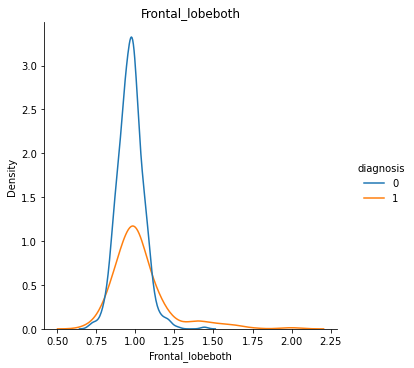

In [4]:
biomarker = biomarkers[0]
sns.displot(data=data, # our dataframe
            x=biomarker, # name of the the distribution we want to plot
            hue='diagnosis', # the "grouping" variable
            kind='kde') # kind can also be 'hist' or 'ecdf'
plt.title(biomarker)
plt.show()

In [5]:
# now we perform the normalization
from sklearn.mixture import GaussianMixture
# make a copy of our dataframe (we don't want to overwrite our original data)
zdata = pandas.DataFrame(data,copy=True)

# for each biomarker
for biomarker in biomarkers:
    temp_data = data[[biomarker]]
    clf = GaussianMixture(n_components=2, covariance_type='full')
    temp_data['label'] = clf.fit_predict(temp_data)
    mean_value = np.mean(temp_data[temp_data.label ==0][biomarker])
    std_value = np.std(temp_data[temp_data.label ==0][biomarker])
    z_score = (data.loc[:,biomarker] - mean_value) / std_value
    # save zscore back into our new (copied) dataframe
    zdata.loc[:,biomarker] = z_score

C:\Users\USER\anaconda3\envs\d2is\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_15684\790800114.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['label'] = clf.fit_predict(temp_data)
C:\Users\USER\anaconda3\envs\d2is\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:

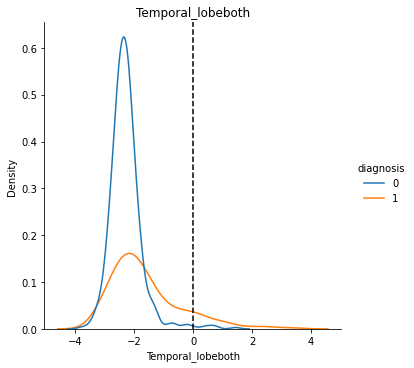

In [6]:
biomarker = biomarkers[1]
sns.displot(data=zdata,x=biomarker,hue='diagnosis',kind='kde')
plt.title(biomarker)
plt.axvline(0,ls='--',c='black') # the 0 line *should* be the mean of the control distribution
plt.show()

In [7]:
N = len(biomarkers)         # number of biomarkers

SuStaInLabels = biomarkers
Z_vals = np.array([[1,2,3]]*N)     # Z-scores for each biomarker
Z_max  = np.array([5]*N)           # maximum z-score

In [8]:
# Input the settings for z-score SuStaIn
# To make the tutorial run faster I've set 
# N_startpoints = 10 and N_iterations_MCMC = int(1e4)
# I recommend using N_startpoints = 25 and 
# N_iterations_MCMC = int(1e5) or int(1e6) in general though

N_startpoints = 25
N_S_max = 5
N_iterations_MCMC = int(1e5)
output_folder = os.path.join(os.getcwd(), 'AdniZscoreOutput')
dataset_name = 'AdniZscoreOutput'

# Initiate the SuStaIn object
sustain_input = pySuStaIn.ZscoreSustain(
                              zdata[biomarkers].values,
                              Z_vals,
                              Z_max,
                              SuStaInLabels,
                              N_startpoints,
                              N_S_max, 
                              N_iterations_MCMC, 
                              output_folder, 
                              dataset_name, 
                              False)

In [9]:
# make the output directory if it's not already created
if not os.path.isdir(output_folder):
    os.mkdir(output_folder)

In [10]:
samples_sequence,   \
samples_f,          \
ml_subtype,         \
prob_ml_subtype,    \
ml_stage,           \
prob_ml_stage,      \
prob_subtype_stage  = sustain_input.run_sustain_algorithm()

Found pickle file: D:\Projects\d2is\pySustain\AdniZscoreOutput\pickle_files\AdniZscoreOutput_subtype0.pickle. Using pickled variables for 0 subtype.
Found pickle file: D:\Projects\d2is\pySustain\AdniZscoreOutput\pickle_files\AdniZscoreOutput_subtype1.pickle. Using pickled variables for 1 subtype.
Found pickle file: D:\Projects\d2is\pySustain\AdniZscoreOutput\pickle_files\AdniZscoreOutput_subtype2.pickle. Using pickled variables for 2 subtype.
Failed to find pickle file: D:\Projects\d2is\pySustain\AdniZscoreOutput\pickle_files\AdniZscoreOutput_subtype3.pickle. Running SuStaIn model for 3 subtype.
Splitting cluster 1 of 3
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-20719.65128952]
Splitting cluster 2 of 3
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-20733.23136156]
Splitting cluster 3 of 3
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical in

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/100000 [00:00<?, ?it/s]

Failed to find pickle file: D:\Projects\d2is\pySustain\AdniZscoreOutput\pickle_files\AdniZscoreOutput_subtype4.pickle. Running SuStaIn model for 4 subtype.
Splitting cluster 1 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-20707.86962728]
Splitting cluster 2 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-20705.05445654]
Splitting cluster 3 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-20709.45964293]
Splitting cluster 4 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-20705.01327563]
Overall ML likelihood is [-20705.01327563]


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/100000 [00:00<?, ?it/s]

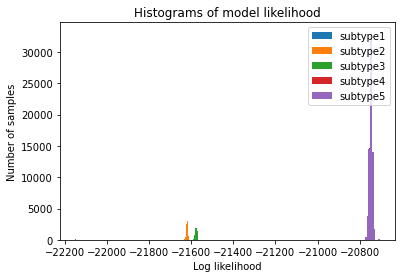

In [32]:
# for each subtype model
for s in range(N_S_max):
    # load pickle file (SuStaIn output) and get the sample log likelihood values
    pickle_filename_s = output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(s) + '.pickle'
    pk = pandas.read_pickle(pickle_filename_s)
    samples_likelihood = pk["samples_likelihood"]
    # plot the values as a line plot
#     print(range(N_iterations_MCMC))
#     print(samples_likelihood.shape)
#     plt.figure(0)
#     plt.plot(range(N_iterations_MCMC), samples_likelihood, label="subtype" + str(s+1))
#     plt.legend(loc='upper right')
#     plt.xlabel('MCMC samples')
#     plt.ylabel('Log likelihood')
#     plt.title('MCMC trace')
    
#     # plot the values as a histogramp plot
    plt.figure(1)
    plt.hist(samples_likelihood, label="subtype" + str(s+1))
    plt.legend(loc='upper right')
    plt.xlabel('Log likelihood')  
    plt.ylabel('Number of samples')  
    plt.title('Histograms of model likelihood')


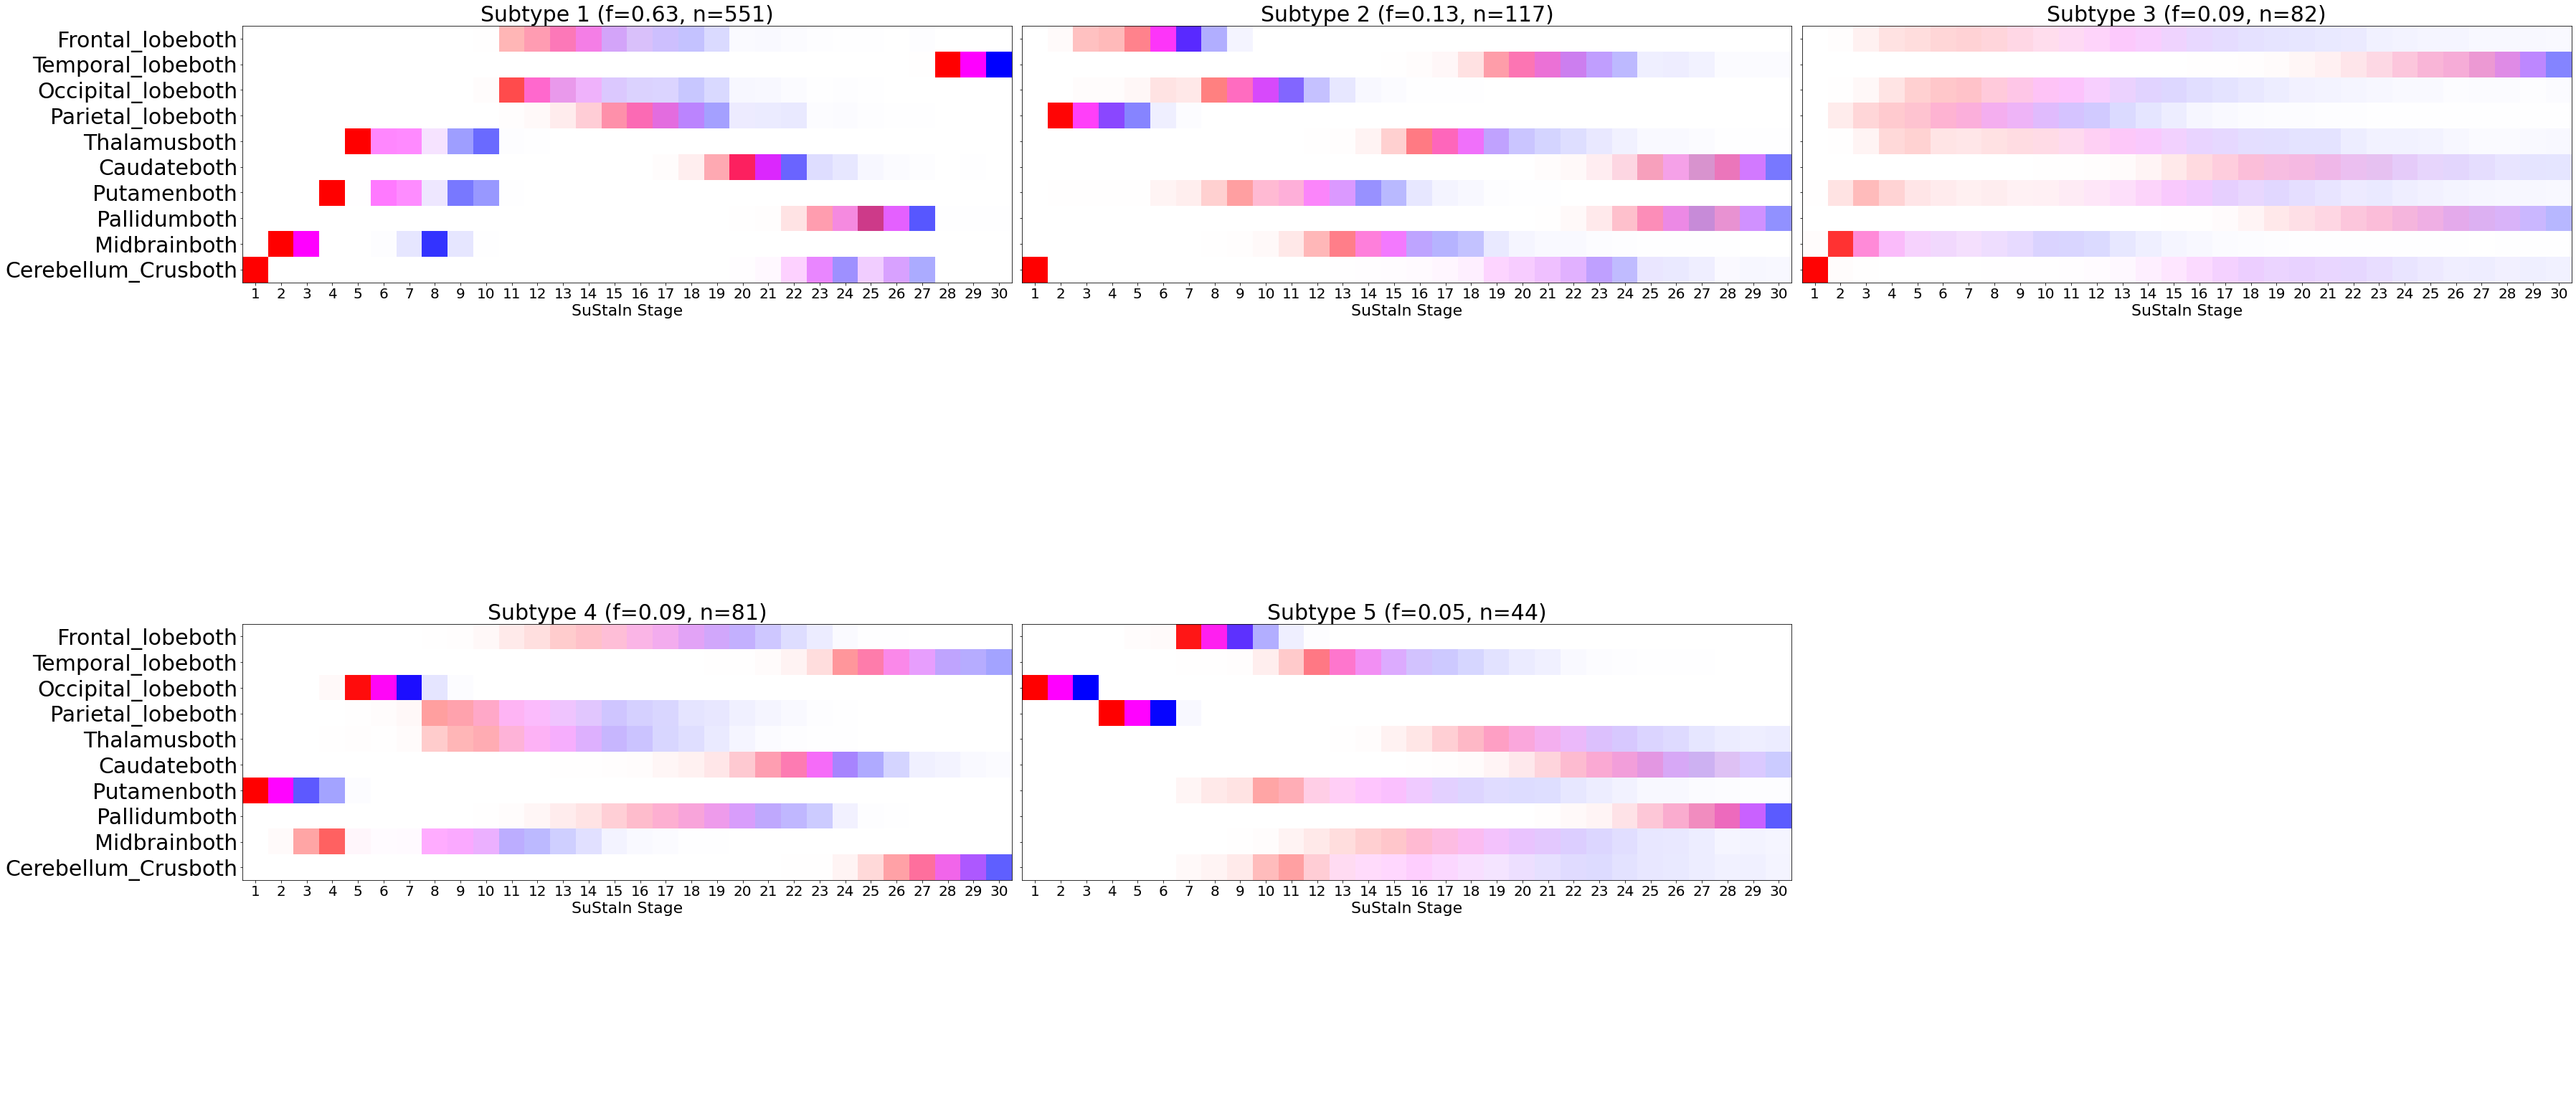

In [34]:
# Let's plot positional variance diagrams to interpret the subtype progressions

s = 4 # 1 split = 2 subtypes
M = len(zdata) 

# get the sample sequences and f
pickle_filename_s = output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(s) + '.pickle'
pk = pandas.read_pickle(pickle_filename_s)
samples_sequence = pk["samples_sequence"]
samples_f = pk["samples_f"]

# use this information to plot the positional variance diagrams
tmp=pySuStaIn.ZscoreSustain._plot_sustain_model(sustain_input,
                                                samples_sequence,
                                                samples_f,
                                                M,
                                                biomarker_labels=biomarkers,
                                                figsize=(50, 25),
                                                title_font_size=30, 
                                                stage_font_size=20,
                                                label_font_size=30)